In [32]:
import pandas as pd
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from nltk import word_tokenize
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import datetime

In [33]:
df = pd.read_csv('csv/cleaned_tweets.csv').drop(['Unnamed: 0'],axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63778 entries, 0 to 63777
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           63778 non-null  float64
 1   tweet        63778 non-null  object 
 2   language     63778 non-null  object 
 3   date_time    63778 non-null  object 
 4   clean_tweet  62981 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.4+ MB


In [35]:
df.isna().sum()

id               0
tweet            0
language         0
date_time        0
clean_tweet    797
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63778 entries, 0 to 63777
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           63778 non-null  float64
 1   tweet        63778 non-null  object 
 2   language     63778 non-null  object 
 3   date_time    63778 non-null  object 
 4   clean_tweet  62981 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.4+ MB


In [37]:
analyzer = SentimentIntensityAnalyzer()

scores = []
for sentence in df['tweet']:
  score = analyzer.polarity_scores(sentence)
  scores.append(score)
  
scores = pd.DataFrame(scores)

df['Compound'] = scores['compound']
df['Negative'] = scores['neg']
df['Neutral'] = scores['neu']
df['Positive'] = scores['pos']
df.head()

,id,tweet,language,date_time,clean_tweet,Compound,Negative,Neutral,Positive
0,1.440000e+18,TG 13 iPhone 13 Giveaway!!! https://t.co/Wffx...,en,2021-09-26 10:23:04,tg giveaway,0.0000,0.000,1.000,0.000
1,1.440000e+18,I kind of want the iPhone 13 🤔,en,2021-09-26 10:23:04,kind want,0.0772,0.000,0.794,0.206
2,1.440000e+18,TG 13 iPhone 13 Giveaway!!! https://t.co/LN1B...,en,2021-09-26 10:22:51,tg giveaway,0.0000,0.000,1.000,0.000
3,1.440000e+18,iphone 13 is another huge distraction from the...,en,2021-09-26 10:22:28,another huge distraction enemy well humble ge...,-0.2263,0.251,0.535,0.214
4,1.440000e+18,@TrollTheMagic I know you are going to buy iPh...,en,2021-09-26 10:22:09,trollthemagic know go buy pro max,0.0000,0.000,1.000,0.000


In [38]:
sentiment = []

for i in range(len(df)):
  if (df['Compound'][i] < 0):
    sentiment.append("Negative")
  elif (df['Compound'][i] > 0):
    sentiment.append("Positive")
  else:
    sentiment.append("Neutral")
    
sentiment = pd.DataFrame(sentiment)
df['Sentiment'] = sentiment
df.head()

,id,tweet,language,date_time,clean_tweet,Compound,Negative,Neutral,Positive,Sentiment
0,1.440000e+18,TG 13 iPhone 13 Giveaway!!! https://t.co/Wffx...,en,2021-09-26 10:23:04,tg giveaway,0.0000,0.000,1.000,0.000,Neutral
1,1.440000e+18,I kind of want the iPhone 13 🤔,en,2021-09-26 10:23:04,kind want,0.0772,0.000,0.794,0.206,Positive
2,1.440000e+18,TG 13 iPhone 13 Giveaway!!! https://t.co/LN1B...,en,2021-09-26 10:22:51,tg giveaway,0.0000,0.000,1.000,0.000,Neutral
3,1.440000e+18,iphone 13 is another huge distraction from the...,en,2021-09-26 10:22:28,another huge distraction enemy well humble ge...,-0.2263,0.251,0.535,0.214,Negative
4,1.440000e+18,@TrollTheMagic I know you are going to buy iPh...,en,2021-09-26 10:22:09,trollthemagic know go buy pro max,0.0000,0.000,1.000,0.000,Neutral


In [9]:
df.dropna(inplace=True)
df.isna().sum()

id             0
tweet          0
language       0
date_time      0
clean_tweet    0
Compound       0
Negative       0
Neutral        0
Positive       0
Sentiment      0
dtype: int64

In [44]:
df.Sentiment.value_counts()

Neutral     27704
Positive    26255
Negative     9819
Name: Sentiment, dtype: int64

<AxesSubplot:title={'center':'Total Tweets for Each Sentiment'}, ylabel='Sentiment'>

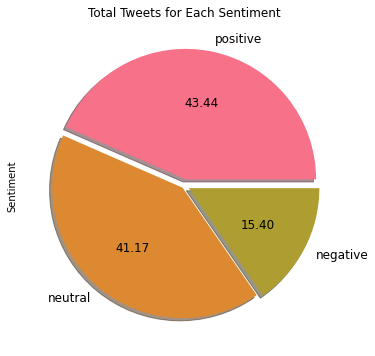

In [46]:
plt.figure(figsize=(12,5))
df['Sentiment'].value_counts().plot(kind='pie', autopct="%.1f%%");
plt.title('Total Tweets', fontsize=20)
plt.show()

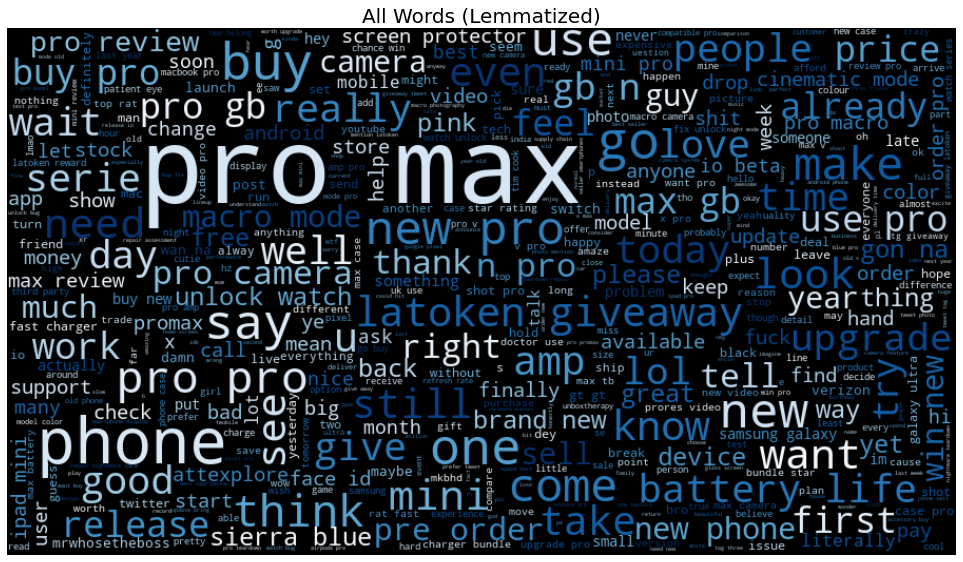

In [10]:
# WordCloud for all words
all_words = ' '.join([text for text in df['clean_tweet']])

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(all_words)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('All Words (Lemmatized)', fontsize=20)
plt.show()

In [11]:
negative_df = df[df['Sentiment'] == 'Negative']

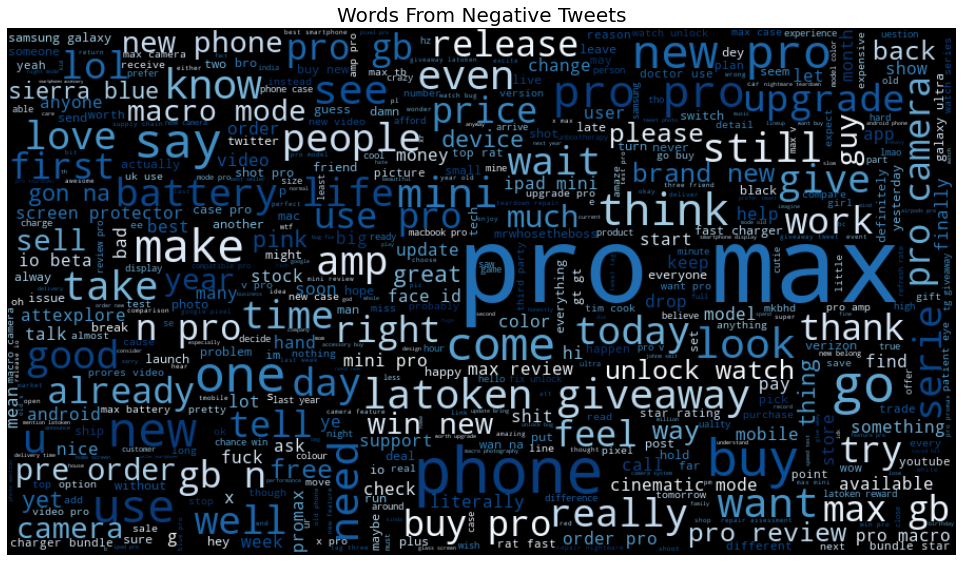

In [12]:
negative_words = ' '.join([text for text in negative_df['clean_tweet']])

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(all_words)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Words From Negative Tweets', fontsize=20)
plt.show()

In [13]:
positive_df = df[df['Sentiment'] == 'Positive']

In [14]:
positive_df.head()

,id,tweet,language,date_time,clean_tweet,Compound,Negative,Neutral,Positive,Sentiment
1,1.440000e+18,I kind of want the iPhone 13 🤔,en,2021-09-26 10:23:04,kind want,0.0772,0.000,0.794,0.206,Positive
9,1.440000e+18,Apple will fix iPhone 13 'Unlock with Apple Wa...,en,2021-09-26 10:21:33,fix unlock watch soon day silence sunday c...,0.2023,0.038,0.907,0.054,Positive
11,1.440000e+18,iPhone 13 Unboxing 💙 Let’s see if this video...,en,2021-09-26 10:20:59,unboxing let see video well twitter like ig,0.5983,0.000,0.766,0.234,Positive
14,1.440000e+18,@TmarTn I hope with this giveaway and much mo...,en,2021-09-26 10:20:24,tmartn hope giveaway much upcoming channel rea...,0.8779,0.000,0.719,0.281,Positive
19,1.440000e+18,Apple company shares crashes after iPhone 13 a...,en,2021-09-26 10:19:24,company share crash announcement,0.2960,0.000,0.784,0.216,Positive


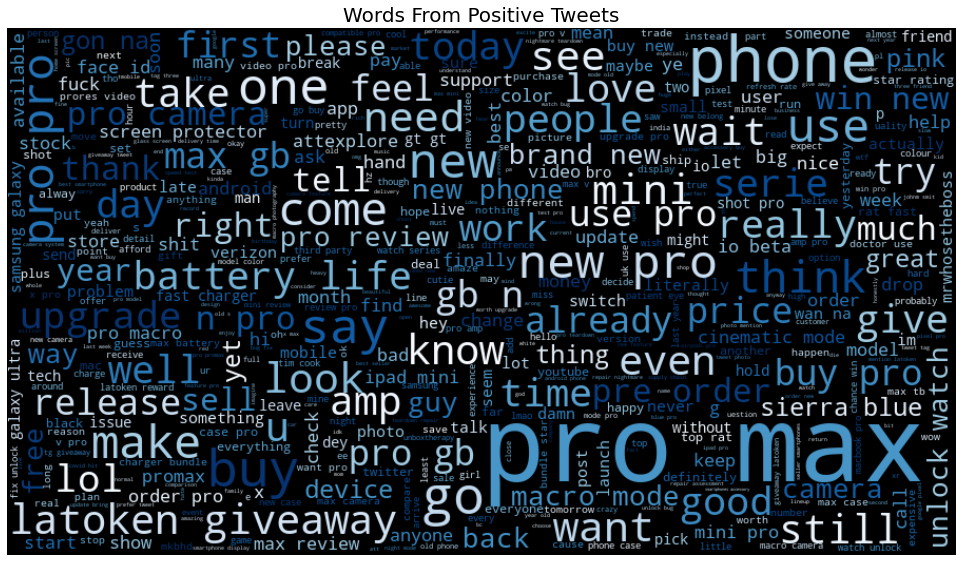

In [15]:
positive_words = ' '.join([text for text in positive_df['clean_tweet']])

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(all_words)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Words From Positive Tweets', fontsize=20)
plt.show()

In [16]:
df.to_csv('csv/tweet_sentiment.csv')

In [17]:
positive_df['clean_tweet'].value_counts()

win new                                                                                                                432
top rat  fast charger bundle star rating                                                                               244
attexplore                                                                                                             126
 cutie                                                                                                                  97
 model color would prefer tweet photo mention latoken  giveaway tweet tag three friend                                  61
                                                                                                                      ... 
mom like get parcel  pro max arrive                                                                                      1
tmartn mf wake                                                                                                           1
go store saw gen

In [18]:
selected_words = ['battery', 'display', 'camera', 'pro', 'max', 'price', 'upgrade', 'color', 'screen']

In [19]:
positive_words_string = ' '.join([tweet for tweet in positive_df.clean_tweet])
positive_words_list = positive_words_string.split()

In [20]:
positive_words_list

['kind',
 'want',
 'fix',
 'unlock',
 'watch',
 'soon',
 'day',
 'silence',
 'sunday',
 'confirm',
 'unlock',
 'watch',
 'feature',
 'fix',
 'software',
 'patch',
 'support',
 'document',
 'publish',
 'sunday',
 'confirm',
 'issue',
 'limit',
 'unboxing',
 'let',
 'see',
 'video',
 'well',
 'twitter',
 'like',
 'ig',
 'tmartn',
 'hope',
 'giveaway',
 'much',
 'upcoming',
 'channel',
 'reach',
 'many',
 'people',
 'become',
 'part',
 'community',
 'well',
 'good',
 'luck',
 'everyone',
 'pro',
 'max',
 'company',
 'share',
 'crash',
 'announcement',
 'ok',
 'mean',
 'old',
 'model',
 'get',
 'cheap',
 'dog',
 'awesome',
 'normally',
 'run',
 'well',
 'almost',
 'device',
 'recently',
 'go',
 'full',
 'public',
 'release',
 'wait',
 'new',
 'pro',
 'max',
 'new',
 'ipad',
 'mini',
 'sixth',
 'generation',
 'use',
 'icloud',
 'backgup',
 'check',
 'order',
 'pro',
 'virginmedia',
 'make',
 'sure',
 'link',
 'broadband',
 'account',
 'order',
 'show',
 'already',
 'customer',
 'virginmobil

In [21]:
positive_dict_counts = Counter(positive_words_list)

In [22]:
positive_output_dict_counts = dict((k, positive_dict_counts[k]) for k in selected_words)

positive_output_dict_counts

{'battery': 1382,
 'display': 580,
 'camera': 2228,
 'pro': 13297,
 'max': 6059,
 'price': 458,
 'upgrade': 1028,
 'color': 558,
 'screen': 989}

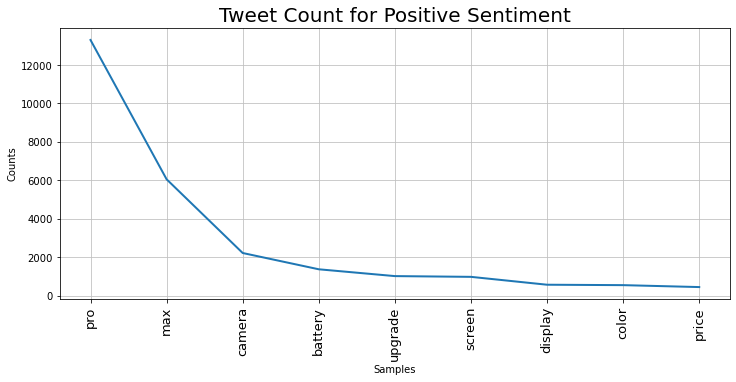

<AxesSubplot:title={'center':'Tweet Count for Positive Sentiment'}, xlabel='Samples', ylabel='Counts'>

In [30]:
plt.figure(figsize=(12,5))
plt.bar(range(len(positive_output_dict_counts)), positive_output_dict_counts.values(), align='center')
plt.xticks(range(len(positive_output_dict_counts)), list(positive_output_dict_counts.keys()), fontsize=13)
plt.title('Tweet Count for Positive Sentiment', fontsize=20)
plt.show()

In [24]:
negative_words_string = ' '.join([tweet for tweet in negative_df.clean_tweet])
negative_words_list = negative_words_string.split()

In [25]:
negative_words_list

['another',
 'huge',
 'distraction',
 'enemy',
 'well',
 'humble',
 'get',
 'flip',
 'phone',
 'lol',
 'promise',
 'fix',
 'broken',
 'unlock',
 'watch',
 'feature',
 'absolutely',
 'reason',
 'people',
 'buy',
 'cause',
 'really',
 'nothing',
 'promise',
 'fix',
 'broken',
 'unlock',
 'watch',
 'feature',
 'fix',
 'issue',
 'prevent',
 'user',
 'unlock',
 'watch',
 'upcoming',
 'software',
 'update',
 'face',
 'id',
 'stop',
 'work',
 'replace',
 'screen',
 'third',
 'party',
 'repair',
 'video',
 'fix',
 'issue',
 'prevent',
 'user',
 'unlock',
 'watch',
 'upcoming',
 'software',
 'update',
 'could',
 'absolutely',
 'care',
 'less',
 'cinematic',
 'mode',
 'whatever',
 'make',
 'round',
 'shitty',
 'focus',
 'pull',
 'mechanic',
 'cap',
 'p',
 'rendersbyian',
 'mac',
 'joseadorno',
 'real',
 'design',
 'buy',
 'second',
 'come',
 'go',
 'tbh',
 'name',
 'bubblepins',
 'get',
 'black',
 'pro',
 'fit',
 'color',
 'soul',
 'fix',
 'issue',
 'prevent',
 'user',
 'unlock',
 'watch',
 'upc

In [26]:
negative_dict_counts = Counter(negative_words_list)

In [27]:
negative_output_dict_counts = dict((k, negative_dict_counts[k]) for k in selected_words)

negative_output_dict_counts

{'battery': 440,
 'display': 147,
 'camera': 579,
 'pro': 3826,
 'max': 1931,
 'price': 189,
 'upgrade': 338,
 'color': 91,
 'screen': 415}

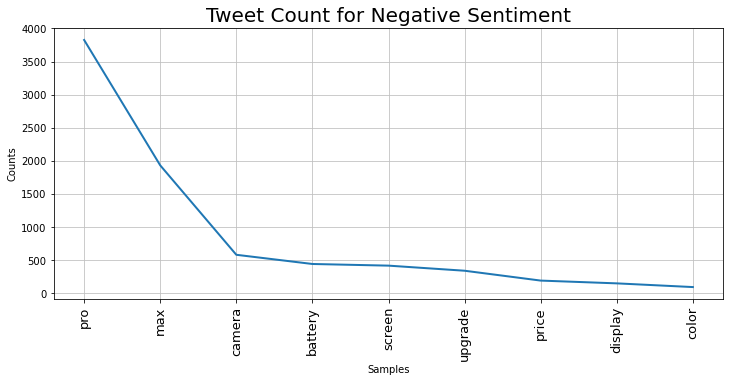

<AxesSubplot:title={'center':'Tweet Count for Negative Sentiment'}, xlabel='Samples', ylabel='Counts'>

In [28]:
plt.figure(figsize=(12,5))
plt.bar(range(len(negative_output_dict_counts)), negative_output_dict_counts.values(), align='center')
plt.xticks(range(len(negative_output_dict_counts)), list(negative_output_dict_counts.keys()), fontsize=13)
plt.title('Tweet Count for Negative Sentiment', fontsize=20)
plt.show()